In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Box Cox Transform

In [4]:
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X = df.drop(columns = ['Strength'])
y = df['Strength']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

ypred = lr.predict(X_test)

In [12]:
r2_score(y_test, ypred)

0.6275531792314851

In [13]:
np.mean(cross_val_score(lr, X, y, scoring = 'r2'))

0.46099404916628667

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


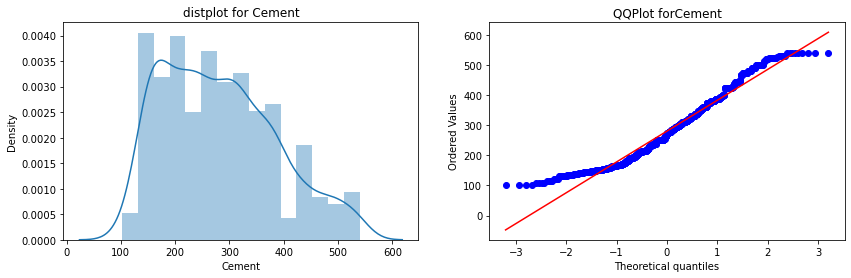

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


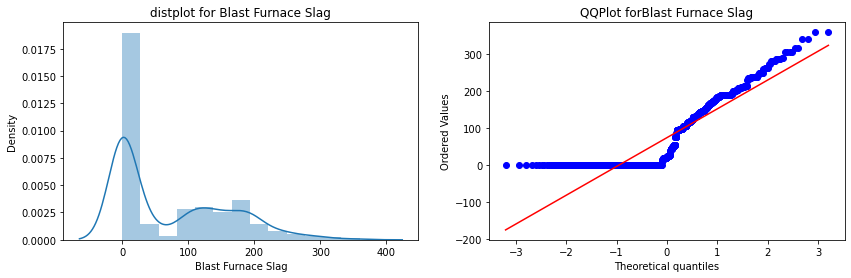

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


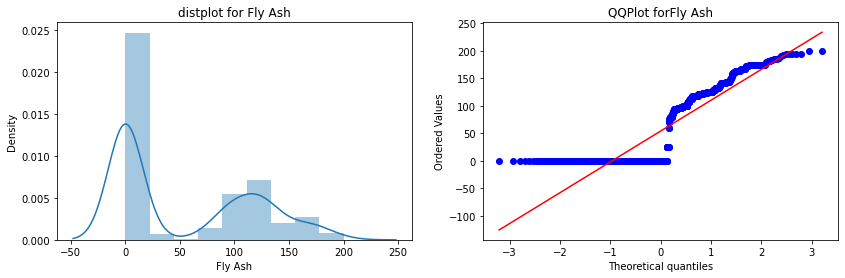

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


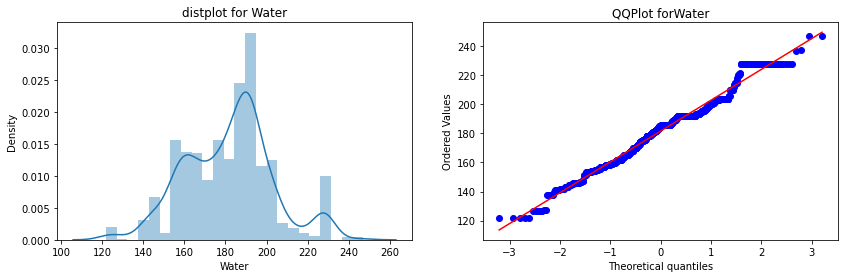

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


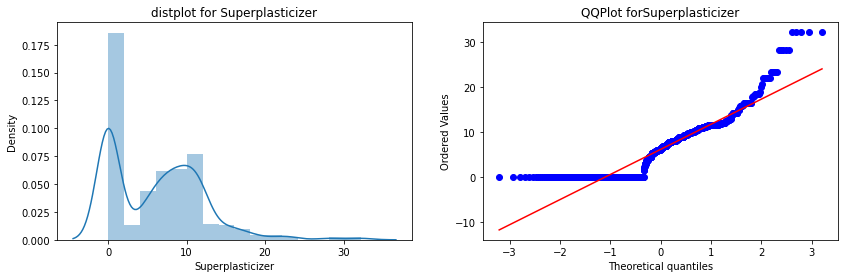

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


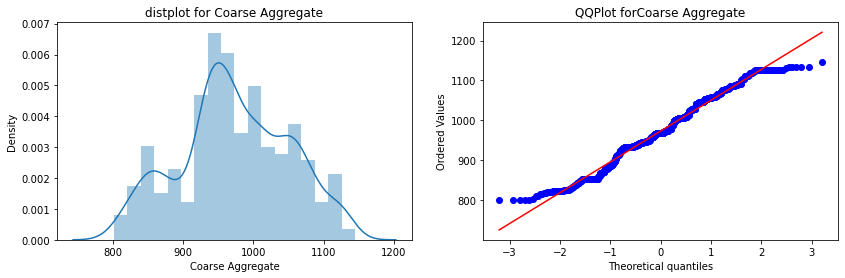

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


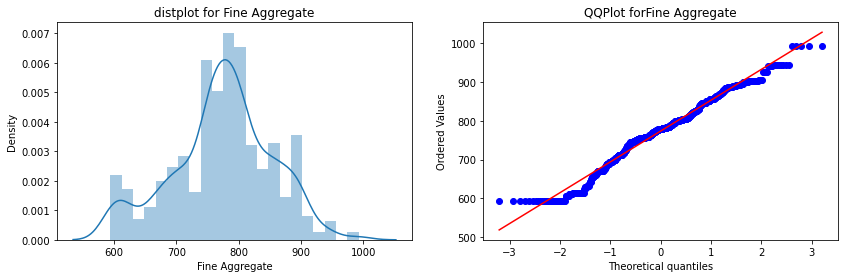

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


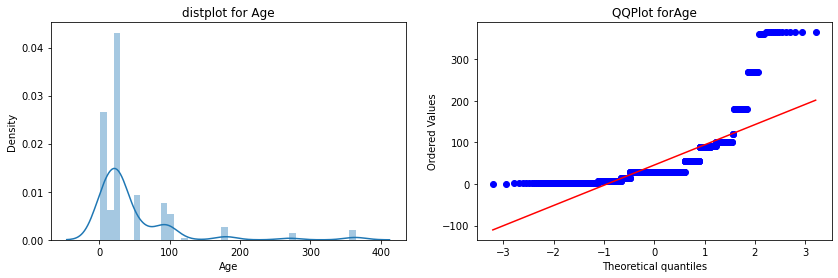

In [14]:
for col in X_train.columns:
    data = df.copy()
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(data[col])
    plt.title(f'distplot for {col}')
    
    plt.subplot(122)
    stats.probplot(data[col], dist = 'norm', plot = plt)
    plt.title(f'QQPlot for{col}')
    
    plt.show()

In [15]:
# applying  box cox transform

pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [16]:
# applying linear regression on transformed data

lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)

In [17]:
r2_score(y_test, y_pred)

0.8047825006181188

In [18]:
X_transformed = pt.fit_transform(X + 0.00001)
np.mean(cross_val_score(lr, X_transformed, y, scoring = 'r2'))

0.6668489653763874

In [19]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

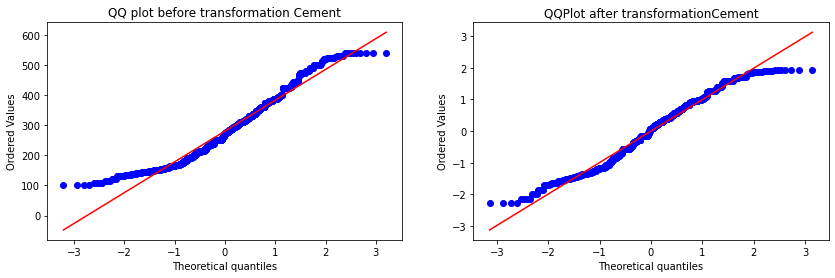

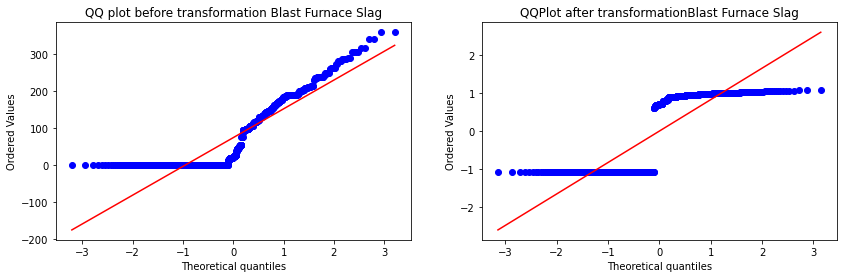

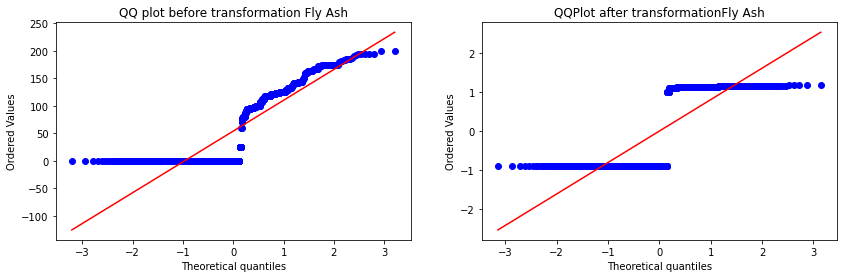

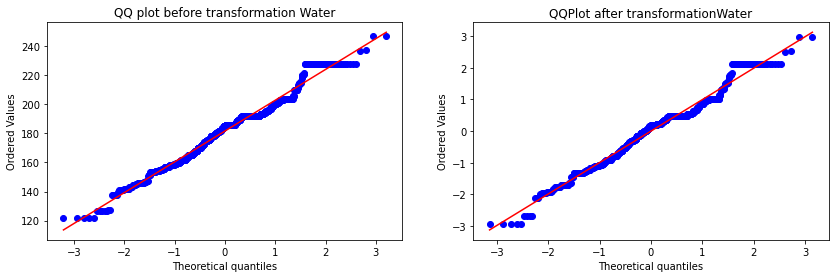

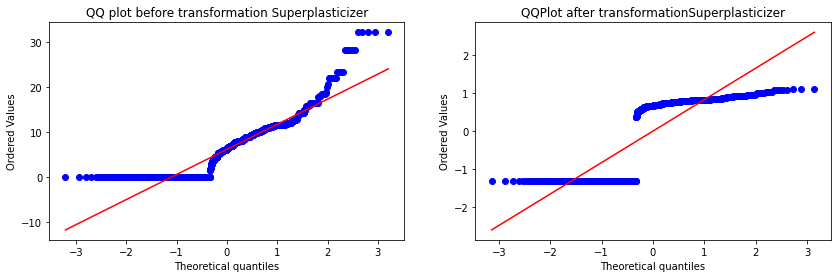

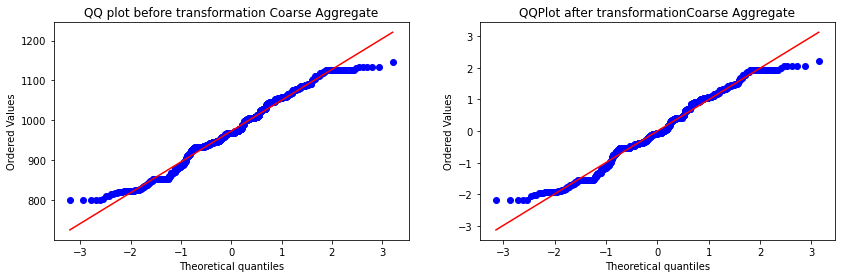

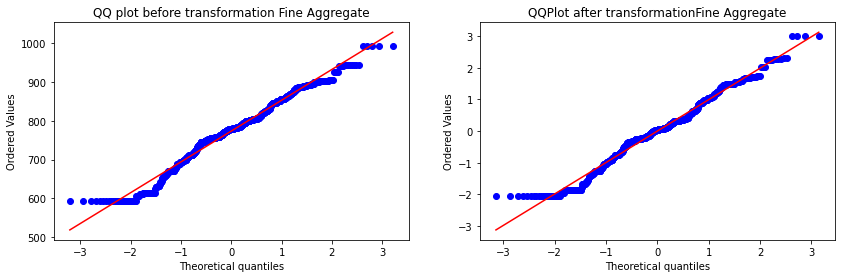

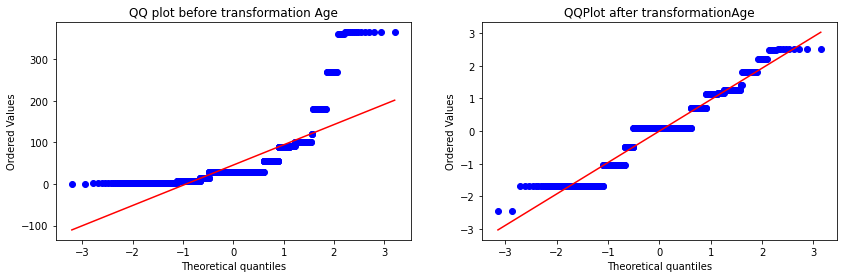

In [20]:
for col in X_train.columns:
    data = df.copy()
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    stats.probplot(data[col], dist = 'norm', plot = plt)
    plt.title(f'QQ plot before transformation {col}')
    
    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist = 'norm', plot = plt)
    plt.title(f'QQPlot after transformation{col}')
    
    plt.show()

# YeoJohnson Transformation

In [21]:
# applying  box cox transform

pt = PowerTransformer(method = 'yeo-johnson')

X_train_transformed1 = pt.fit_transform(X_train)
X_test_transformed1 = pt.transform(X_test)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [22]:
# applying linear regression on transformed data

lr.fit(X_train_transformed1, y_train)

y_pred = lr.predict(X_test_transformed1)

In [23]:
r2_score(y_test, y_pred)

0.8161906513339305

In [24]:
X_transformed1 = pt.fit_transform(X)
np.mean(cross_val_score(lr, X_transformed1, y, scoring = 'r2'))

0.6834625134285744

In [25]:
X_train_transformed1 = pd.DataFrame(X_train_transformed1, columns = X_train.columns)

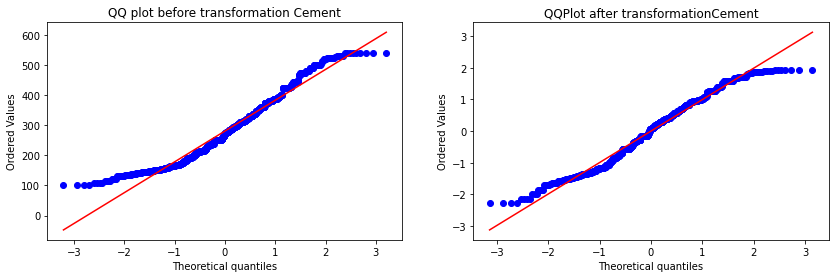

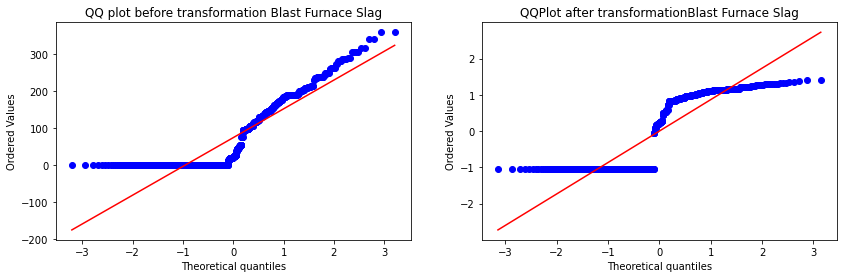

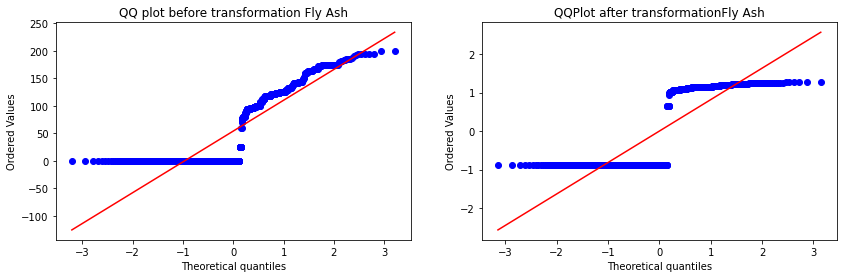

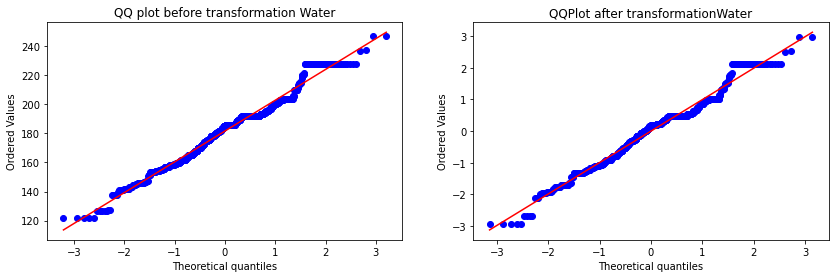

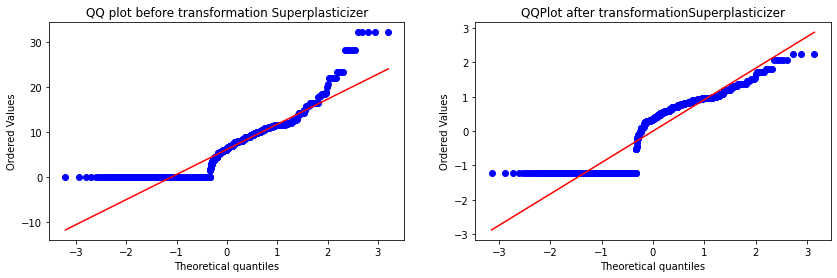

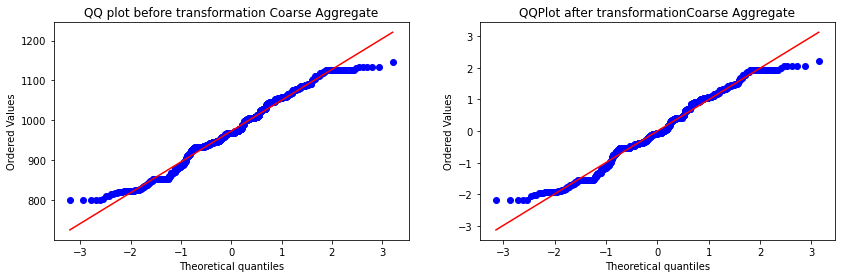

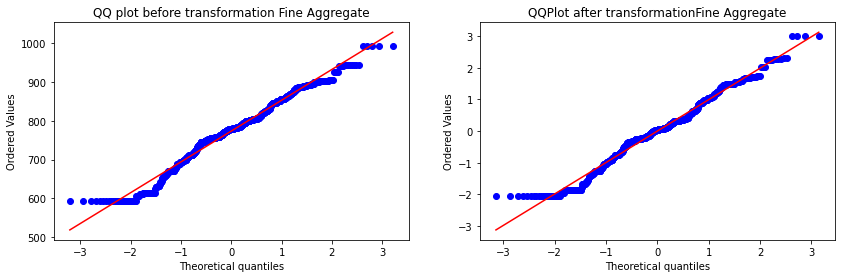

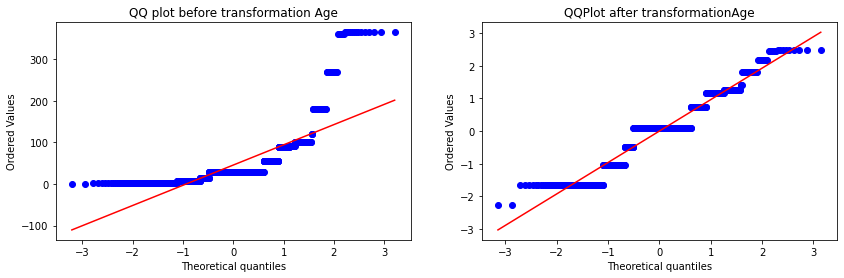

In [26]:
for col in X_train.columns:
    data = df.copy()
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    stats.probplot(data[col], dist = 'norm', plot = plt)
    plt.title(f'QQ plot before transformation {col}')
    
    plt.subplot(122)
    stats.probplot(X_train_transformed1[col], dist = 'norm', plot = plt)
    plt.title(f'QQPlot after transformation{col}')
    
    plt.show()